# Analyze LSTM predictions of female walking from song

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

from disp import set_plot, colors

## Loop over hparam sets

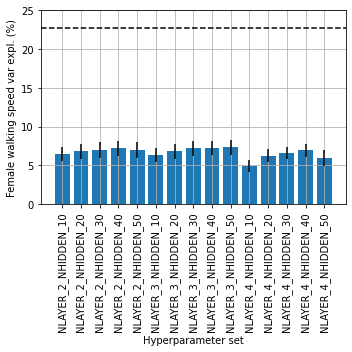

In [9]:
# get max test r2 and save
DATA_DIR = 'data/simple/torch/lstm/lookback_1800/'
HPARAM_DIRS = [
    'NLAYER_2_NHIDDEN_10',
    'NLAYER_2_NHIDDEN_20',
    'NLAYER_2_NHIDDEN_30',
    'NLAYER_2_NHIDDEN_40',
    'NLAYER_2_NHIDDEN_50',
    # 'NLAYER_2_NHIDDEN_60',
    # 'NLAYER_2_NHIDDEN_70',
    # 'NLAYER_2_NHIDDEN_80',
    # 'NLAYER_2_NHIDDEN_90',
    # 'NLAYER_2_NHIDDEN_100',
    
    'NLAYER_3_NHIDDEN_10',
    'NLAYER_3_NHIDDEN_20',
    'NLAYER_3_NHIDDEN_30',
    'NLAYER_3_NHIDDEN_40',
    'NLAYER_3_NHIDDEN_50',
    # 'NLAYER_3_NHIDDEN_60',
    # 'NLAYER_3_NHIDDEN_70',
    # 'NLAYER_3_NHIDDEN_80',
    # 'NLAYER_3_NHIDDEN_90',
    # 'NLAYER_3_NHIDDEN_100',
    
    'NLAYER_4_NHIDDEN_10',
    'NLAYER_4_NHIDDEN_20',
    'NLAYER_4_NHIDDEN_30',
    'NLAYER_4_NHIDDEN_40',
    'NLAYER_4_NHIDDEN_50',
]

r2_bests = {}
nsplits = {}
hparam_strs = []

for hparam_dir in HPARAM_DIRS:
    data_dir = os.path.join(DATA_DIR, hparam_dir)
    fnames = sorted([fname for fname in os.listdir(data_dir) if fname.endswith('.npy')])

    if len(fnames) == 0:
        r2_bests[hparam_dir] = []
        nsplits[hparam_dir] = 0
        
        continue
        
    data_splits = [
        np.load(os.path.join(data_dir, fname), allow_pickle=True)[0]
        for fname in fnames
    ]
    
    temp = {}
    # only keep splits with largest number of epochs
    for data_split, fname in zip(data_splits, fnames):
        # get split
        split = int(re.search('split_(.*?).npy', fname).group(1))
        data_split['SPLIT'] = split
        
        if split not in temp:
            temp[split] = data_split
        elif temp[split]['NEPOCH'] < data_split['NEPOCH']:
            temp[split] = data_split
        
    data_splits = [v for k, v in temp.items()]

    r2_bests[hparam_dir] = [np.max(data['r2_tests']) for data in data_splits]
    nsplits[hparam_dir] = len(data_splits)

    hparam_str = f'NLAYER_{data_splits[0]["NLAYER"]}_NHIDDEN_{data_splits[0]["NHIDDEN"]}_LR_{data_splits[0]["LR"]}'
    hparam_strs.append(hparam_str)
    # fsave = os.path.join(DATA_DIR, f'{hparam_str}.npy')
    # np.save(fsave, np.array([{
    #     'r2_bests': r2_bests[:len(data_splits), chparam], 'NLAYER': data_splits[0]["NLAYER"], 'NHIDDEN': data_splits[0]["NHIDDEN"],
    #     'LR': data_splits[0]["LR"], 'NEPOCH': data_splits[0]["NEPOCH"],
    # }]))

fig, ax = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)

x_tick_labels = []
for cbar, (hparam_dir, r2_bests_) in enumerate(r2_bests.items()):
    nsplit = nsplits[hparam_dir]
    ax.bar(cbar, 100*np.nanmean(r2_bests_), yerr=100*np.nanstd(r2_bests_)/np.sqrt(nsplit), color=colors[0])
    x_tick_labels.append(f'{hparam_dir}')
    # x_tick_labels.append(f'{hparam_dir} (NSPLIT={nsplit})')
    
ax.axhline(22.678787, c='k', ls='--')
ax.set_ylim(0, 25)
ax.set_xlabel('Hyperparameter set')
ax.set_ylabel('Female walking speed var expl. (%)')
ax.set_xticks(range(len(HPARAM_DIRS)))
ax.set_xticklabels(x_tick_labels, rotation=90)
ax.grid()

fig.savefig('supp/s19_hparam_sweep_lstm.svg')

## Inspect epochs

NLAYER_2_NHIDDEN_10_LR_0.01


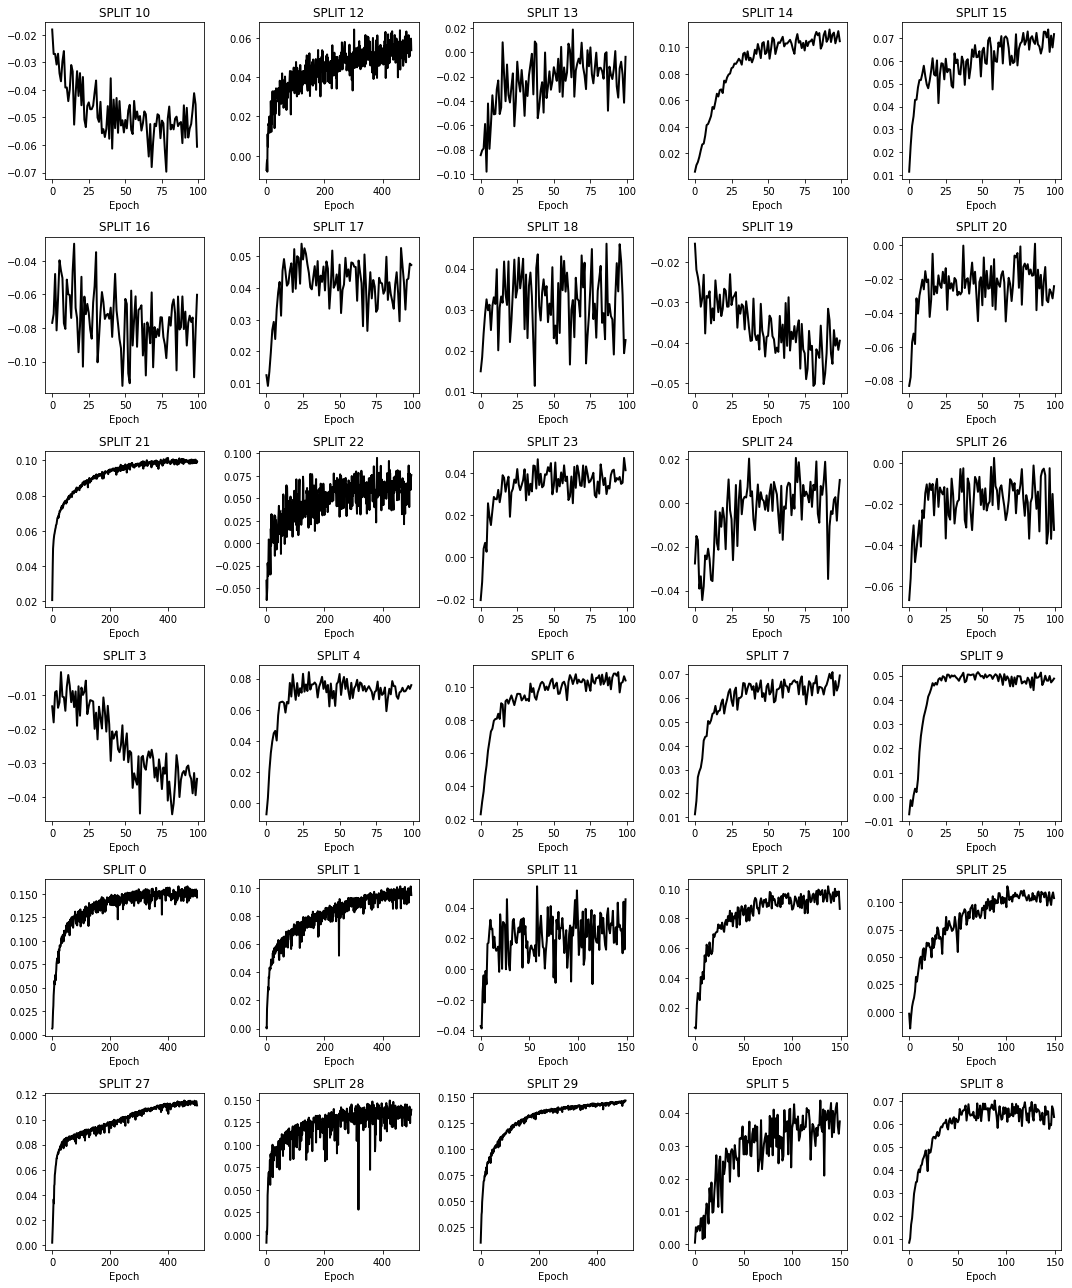

In [6]:
HPARAM_DIR = 'NLAYER_2_NHIDDEN_10'
# HPARAM_DIR = 'NLAYER_2_NHIDDEN_20'
# HPARAM_DIR = 'NLAYER_2_NHIDDEN_30'
# HPARAM_DIR = 'NLAYER_2_NHIDDEN_40'
# HPARAM_DIR = 'NLAYER_2_NHIDDEN_50'

# HPARAM_DIR = 'NLAYER_3_NHIDDEN_10'
# HPARAM_DIR = 'NLAYER_3_NHIDDEN_20'
# HPARAM_DIR = 'NLAYER_3_NHIDDEN_30'
# HPARAM_DIR = 'NLAYER_3_NHIDDEN_40'
# HPARAM_DIR = 'NLAYER_3_NHIDDEN_50'

# HPARAM_DIR = 'NLAYER_4_NHIDDEN_10'
# HPARAM_DIR = 'NLAYER_4_NHIDDEN_20'
# HPARAM_DIR = 'NLAYER_4_NHIDDEN_30'
# HPARAM_DIR = 'NLAYER_4_NHIDDEN_40'
# HPARAM_DIR = 'NLAYER_4_NHIDDEN_50'

data_dir = os.path.join(DATA_DIR, HPARAM_DIR)
fnames = sorted([fname for fname in os.listdir(data_dir) if fname.endswith('.npy')])
data_splits = [
    np.load(os.path.join(data_dir, fname), allow_pickle=True)[0]
    for fname in fnames
]

temp = {}
# only keep splits with largest number of epochs
for data_split, fname in zip(data_splits, fnames):
    # get split
    split = int(re.search('split_(.*?).npy', fname).group(1))
    data_split['SPLIT'] = split

    if split not in temp:
        temp[split] = data_split
    elif temp[split]['NEPOCH'] < data_split['NEPOCH']:
        temp[split] = data_split

data_splits = [v for k, v in temp.items()]

fig, axs = plt.subplots(6, 5, figsize=(15, 18), tight_layout=True)
for ax, fname, data in zip(axs.flat, fnames, data_splits):
    ax.plot(data['r2_tests'], c='k', lw=2)
    ax.set_xlabel('Epoch')
    ax.set_title(f'SPLIT {data["SPLIT"]}')  #fname[-12:])

hparam_str = f'NLAYER_{data_splits[0]["NLAYER"]}_NHIDDEN_{data_splits[0]["NHIDDEN"]}_LR_{data_splits[0]["LR"]}'
print(hparam_str)

In [10]:
fnames

['NLAYER_4_NHIDDEN_20_NEPOCH_150_LR_0.01_split_0.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_150_LR_0.01_split_1.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_150_LR_0.01_split_11.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_150_LR_0.01_split_15.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_150_LR_0.01_split_27.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_150_LR_0.01_split_28.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_150_LR_0.01_split_6.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_200_LR_0.01_split_21.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_200_LR_0.01_split_29.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_200_LR_0.01_split_8.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_75_LR_0.01_split_0.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_75_LR_0.01_split_1.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_75_LR_0.01_split_10.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_75_LR_0.01_split_11.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_75_LR_0.01_split_12.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_75_LR_0.01_split_13.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_75_LR_0.01_split_14.npy',
 'NLAYER_4_NHIDDEN_20_NEPOCH_75_LR_0.01_split_15.npy',
 'NLAY